In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
def load_dataset_and_create_diff_column(filename):
    df = pd.read_csv(filename, index_col=0)
    df['diff'] =  (df['filtered_size'] * 100) / df['original_size']
    df['porcentagem_reduzida'] = 100 - df['diff']
    df.sort_values(by='cloud', inplace=True)
    
    return df

def get_stats(df):
    pr_mean = df['porcentagem_reduzida'].mean()
    pr_var = df['porcentagem_reduzida'].var()
    print('Porcentagem reduzida')
    print('  Média: {}\n  Variância: {}'.format(
        pr_mean,
        pr_var
    ))
    
    n_points = df['original_size'].isna().sum()
    print('Número de pontos que não possuem o ponto fiducial marcado: {}'.format(n_points))
    
    ma, mi = df['filtered_size'].max(), df['filtered_size'].min()
    print('Tamanho da nuvem filtrada')
    print('  Máximo: {}\n  Mínimo: {}\n  Média: {}\n  Variância: {}'.format(
        ma,
        mi,
        df['filtered_size'].mean(),
        df['filtered_size'].var()
    ))
    
    return pr_mean, pr_var, n_points, ma, mi

# Resultados v1 - Canto interno do olho direito

Filtros utilizados:
- Curvatura Gaussiana: [0.002, 0.0075]
- Anisotropia: [0.86, 0.94]

In [3]:
lre_cloud, lre_point = [], []
with open('landmarks_right_eye.txt', 'r') as f:
    for line in f.readlines():
        spl = line.split(':')
        cloud = spl[0]
        point = spl[1].strip()
        lre_cloud.append(cloud)
        lre_point.append(point)
df_tmp = pd.DataFrame({'cloud': lre_cloud, 'points': lre_point})
df_tmp.sort_values(by='cloud', inplace=True)

In [4]:
dfrev1 = load_dataset_and_create_diff_column('experiments_right_eye.csv')
dfrev1['landmarks'] = df_tmp['points']
dfrev1

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,909.0,1.0,2.525912,97.474088,-15.601 -2.163 12
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,972.0,0.0,2.786697,97.213303,-19.342 -1.245 19.025
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,765.0,1.0,2.278617,97.721383,-12.587 1.645 9.665
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1003.0,0.0,2.860647,97.139353,-1.149 5.1 13.377
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,704.0,1.0,2.002902,97.997098,-0.17 1.363 15.56
...,...,...,...,...,...,...,...,...,...,...
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,771.0,0.0,1.782453,98.217547,40.203 -2.225 -26.001
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,797.0,0.0,1.774463,98.225537,22.343 -1.759 -12.04
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,792.0,0.0,1.866648,98.133352,32.935 21.281 -9.514
4662,bs104_YR_R45_0.pcd,104,R45,YR,39012.0,707.0,0.0,1.812263,98.187737,51.031 9.195 -35.288


## Dados

In [5]:
get_stats(dfrev1)

Porcentagem reduzida
  Média: 97.93980461331431
  Variância: 0.46358951412708954
Número de pontos que não possuem o ponto fiducial marcado: 306
Tamanho da nuvem filtrada
  Máximo: 2440.0
  Mínimo: 114.0
  Média: 765.0990825688074
  Variância: 68419.96586288835


(97.93980461331431, 0.46358951412708954, 306, 2440.0, 114.0)

## Número de nuvens que possuem o ponto fiducial na região filtrada

In [6]:
dfrev1_true = dfrev1.loc[dfrev1['contains'] == 1]
dfrev1_true

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,909.0,1.0,2.525912,97.474088,-15.601 -2.163 12
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,765.0,1.0,2.278617,97.721383,-12.587 1.645 9.665
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,704.0,1.0,2.002902,97.997098,-0.17 1.363 15.56
11,bs000_E_DISGUST_0.pcd,0,DISGUST,E,36751.0,864.0,1.0,2.350956,97.649044,-12.862 2.209 14.433
17,bs000_E_FEAR_0.pcd,0,FEAR,E,38166.0,1143.0,1.0,2.994812,97.005188,-13.876 4.505 17.328
...,...,...,...,...,...,...,...,...,...,...
4636,bs104_E_HAPPY_0.pcd,104,HAPPY,E,41861.0,1205.0,1.0,2.878574,97.121426,21.606 -5.138 -11.884
4612,bs104_LFAU_12_0.pcd,104,12,LFAU,43240.0,1116.0,1.0,2.580944,97.419056,22.724 -12.882 -10.291
4630,bs104_LFAU_14_0.pcd,104,14,LFAU,43213.0,855.0,1.0,1.978571,98.021429,24.068 -8.602 -18.199
4627,bs104_LFAU_27_0.pcd,104,27,LFAU,45565.0,832.0,1.0,1.825963,98.174037,35.112 14.588 -11.93


## Número de nuvens que não possuem o ponto fiducial na região filtrada

In [7]:
dfrev1_false = dfrev1.loc[dfrev1['contains'] == 0]
dfrev1_false

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,972.0,0.0,2.786697,97.213303,-19.342 -1.245 19.025
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1003.0,0.0,2.860647,97.139353,-1.149 5.1 13.377
34,bs000_LFAU_10_0.pcd,0,10,LFAU,37657.0,754.0,0.0,2.002284,97.997716,-20.582 2.718 16.072
32,bs000_LFAU_12_0.pcd,0,12,LFAU,37646.0,721.0,0.0,1.915210,98.084790,-13.332 2.394 10.501
2,bs000_LFAU_15_0.pcd,0,15,LFAU,34142.0,801.0,0.0,2.346084,97.653916,-73.58 -17.398 23.334
...,...,...,...,...,...,...,...,...,...,...
4621,bs104_UFAU_4_0.pcd,104,4,UFAU,40754.0,500.0,0.0,1.226873,98.773127,45.771 14.345 -48.951
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,771.0,0.0,1.782453,98.217547,40.203 -2.225 -26.001
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,797.0,0.0,1.774463,98.225537,22.343 -1.759 -12.04
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,792.0,0.0,1.866648,98.133352,32.935 21.281 -9.514


# Resultados v2 - Canto interno do olho direito

Filtros utilizados:
- Curvatura Gaussiana: [0.002, 0.007]
- Shape Index: [-1, -0.6]

In [8]:
dfrev2 = load_dataset_and_create_diff_column('experiments_right_eye_v2.csv')
dfrev2['landmarks'] = df_tmp['points']
dfrev2

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,1150.0,1.0,3.195598,96.804402,-15.601 -2.163 12
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,1418.0,1.0,4.065367,95.934633,-19.342 -1.245 19.025
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,784.0,0.0,2.335210,97.664790,-12.587 1.645 9.665
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1037.0,0.0,2.957618,97.042382,-1.149 5.1 13.377
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,961.0,1.0,2.734075,97.265925,-0.17 1.363 15.56
...,...,...,...,...,...,...,...,...,...,...
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,569.0,1.0,1.315455,98.684545,40.203 -2.225 -26.001
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,668.0,0.0,1.487254,98.512746,22.343 -1.759 -12.04
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,604.0,0.0,1.423555,98.576445,32.935 21.281 -9.514
4662,bs104_YR_R45_0.pcd,104,R45,YR,39012.0,981.0,1.0,2.514611,97.485389,51.031 9.195 -35.288


## Dados

In [9]:
get_stats(dfrev2)

Porcentagem reduzida
  Média: 97.13108901116344
  Variância: 1.2437677925111807
Número de pontos que não possuem o ponto fiducial marcado: 306
Tamanho da nuvem filtrada
  Máximo: 5345.0
  Mínimo: 153.0
  Média: 1070.3311926605504
  Variância: 192532.42940073367


(97.13108901116344, 1.2437677925111807, 306, 5345.0, 153.0)

## Número de nuvens que possuem o ponto fiducial na região filtrada

In [10]:
dfrev2_true = dfrev2.loc[dfrev2['contains'] == 1]
dfrev2_true

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,1150.0,1.0,3.195598,96.804402,-15.601 -2.163 12
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,1418.0,1.0,4.065367,95.934633,-19.342 -1.245 19.025
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,961.0,1.0,2.734075,97.265925,-0.17 1.363 15.56
11,bs000_E_DISGUST_0.pcd,0,DISGUST,E,36751.0,999.0,1.0,2.718293,97.281707,-12.862 2.209 14.433
17,bs000_E_FEAR_0.pcd,0,FEAR,E,38166.0,1555.0,1.0,4.074307,95.925693,-13.876 4.505 17.328
...,...,...,...,...,...,...,...,...,...,...
4650,bs104_O_GLASSES_0.pcd,104,GLASSES,O,42841.0,1647.0,1.0,3.844448,96.155552,46.264 -3.295 -28.52
4657,bs104_O_HAIR_0.pcd,104,HAIR,O,46396.0,1906.0,1.0,4.108113,95.891887,17.753 -18.066 -0.405
4639,bs104_UFAU_43_0.pcd,104,43,UFAU,42669.0,1071.0,1.0,2.510019,97.489981,33.911 10.733 -5.452
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,569.0,1.0,1.315455,98.684545,40.203 -2.225 -26.001


## Número de nuvens que não possuem o ponto fiducial na região filtrada

In [11]:
dfrev2_false = dfrev2.loc[dfrev2['contains'] == 0]
dfrev2_false

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,784.0,0.0,2.335210,97.664790,-12.587 1.645 9.665
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1037.0,0.0,2.957618,97.042382,-1.149 5.1 13.377
48,bs000_E_SURPRISE_0.pcd,0,SURPRISE,E,39163.0,1280.0,0.0,3.268391,96.731609,8.067 12.6 44.337
34,bs000_LFAU_10_0.pcd,0,10,LFAU,37657.0,1182.0,0.0,3.138859,96.861141,-20.582 2.718 16.072
44,bs000_LFAU_12L_0.pcd,0,12L,LFAU,37201.0,706.0,0.0,1.897798,98.102202,null
...,...,...,...,...,...,...,...,...,...,...
4644,bs104_UFAU_2_0.pcd,104,2,UFAU,42207.0,538.0,0.0,1.274670,98.725330,50.142 -5.594 -20.558
4616,bs104_UFAU_44_0.pcd,104,44,UFAU,42959.0,641.0,0.0,1.492120,98.507880,23.582 -14.229 -0.717
4621,bs104_UFAU_4_0.pcd,104,4,UFAU,40754.0,1202.0,0.0,2.949404,97.050596,45.771 14.345 -48.951
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,668.0,0.0,1.487254,98.512746,22.343 -1.759 -12.04


# Resultados v3 - Canto interno do olho direito

Filtros utilizados:
- Curvatura Gaussiana: [0.002, 0.008]

In [12]:
dfrev3 = load_dataset_and_create_diff_column('experiments_right_eye_v3.csv')
dfrev3['landmarks'] = df_tmp['points']
dfrev3

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,2221.0,1.0,6.171673,93.828327,-15.601 -2.163 12
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,2316.0,1.0,6.639908,93.360092,-19.342 -1.245 19.025
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,1669.0,1.0,4.971257,95.028743,-12.587 1.645 9.665
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1957.0,0.0,5.581541,94.418459,-1.149 5.1 13.377
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,1609.0,1.0,4.577655,95.422345,-0.17 1.363 15.56
...,...,...,...,...,...,...,...,...,...,...
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,1774.0,1.0,4.101260,95.898740,40.203 -2.225 -26.001
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,1836.0,0.0,4.087721,95.912279,22.343 -1.759 -12.04
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,1749.0,1.0,4.122181,95.877819,32.935 21.281 -9.514
4662,bs104_YR_R45_0.pcd,104,R45,YR,39012.0,1576.0,1.0,4.039783,95.960217,51.031 9.195 -35.288


## Dados

In [13]:
get_stats(dfrev3)

Porcentagem reduzida
  Média: 94.83599115678548
  Variância: 2.0619810899977815
Número de pontos que não possuem o ponto fiducial marcado: 306
Tamanho da nuvem filtrada
  Máximo: 8227.0
  Mínimo: 707.0
  Média: 1923.0692660550458
  Variância: 336054.9591836778


(94.83599115678548, 2.0619810899977815, 306, 8227.0, 707.0)

## Número de nuvens que possuem o ponto fiducial na região filtrada

In [14]:
dfrev3_true = dfrev3.loc[dfrev3['contains'] == 1]
dfrev3_true

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,2221.0,1.0,6.171673,93.828327,-15.601 -2.163 12
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,2316.0,1.0,6.639908,93.360092,-19.342 -1.245 19.025
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,1669.0,1.0,4.971257,95.028743,-12.587 1.645 9.665
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,1609.0,1.0,4.577655,95.422345,-0.17 1.363 15.56
11,bs000_E_DISGUST_0.pcd,0,DISGUST,E,36751.0,2035.0,1.0,5.537264,94.462736,-12.862 2.209 14.433
...,...,...,...,...,...,...,...,...,...,...
4644,bs104_UFAU_2_0.pcd,104,2,UFAU,42207.0,1680.0,1.0,3.980382,96.019618,50.142 -5.594 -20.558
4639,bs104_UFAU_43_0.pcd,104,43,UFAU,42669.0,1852.0,1.0,4.340388,95.659612,33.911 10.733 -5.452
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,1774.0,1.0,4.101260,95.898740,40.203 -2.225 -26.001
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,1749.0,1.0,4.122181,95.877819,32.935 21.281 -9.514


## Número de nuvens que não possuem o ponto fiducial na região filtrada

In [15]:
dfrev3_false = dfrev3.loc[dfrev3['contains'] == 0]
dfrev3_false

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1957.0,0.0,5.581541,94.418459,-1.149 5.1 13.377
34,bs000_LFAU_10_0.pcd,0,10,LFAU,37657.0,2155.0,0.0,5.722708,94.277292,-20.582 2.718 16.072
2,bs000_LFAU_15_0.pcd,0,15,LFAU,34142.0,1564.0,0.0,4.580868,95.419132,-73.58 -17.398 23.334
12,bs000_LFAU_9_0.pcd,0,9,LFAU,36786.0,1601.0,0.0,4.352199,95.647801,-2.778 5.887 19.335
29,bs000_PR_U_0.pcd,0,U,PR,33538.0,1585.0,0.0,4.725982,95.274018,0.232 0.133 19.252
...,...,...,...,...,...,...,...,...,...,...
4664,bs104_PR_U_0.pcd,104,U,PR,43228.0,1459.0,0.0,3.375127,96.624873,38.722 10.915 -21.206
4628,bs104_UFAU_1_0.pcd,104,1,UFAU,43527.0,1606.0,0.0,3.689664,96.310336,21.948 -12.362 -10.254
4616,bs104_UFAU_44_0.pcd,104,44,UFAU,42959.0,1866.0,0.0,4.343677,95.656323,23.582 -14.229 -0.717
4621,bs104_UFAU_4_0.pcd,104,4,UFAU,40754.0,1561.0,0.0,3.830299,96.169701,45.771 14.345 -48.951


In [16]:
dfrev3_false['subject'].value_counts()

84    48
12    41
36    41
98    32
31    32
      ..
68     1
72     1
76     1
77     1
65     1
Name: subject, Length: 101, dtype: int64

In [17]:
dfrev3_false.sample(10)

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
3051,bs069_PR_SU_0.pcd,69,SU,PR,34164.0,1170.0,0.0,3.424658,96.575342,8.836 -10.029 47.623
4171,bs095_UFAU_2_0.pcd,95,2,UFAU,29709.0,1124.0,0.0,3.783365,96.216635,44.794 24.25 24.113
3423,bs081_UFAU_2_0.pcd,81,2,UFAU,38133.0,1429.0,0.0,3.747410,96.252590,-35.083 5.322 66.012
2770,bs060_CR_RD_0.pcd,60,RD,CR,32236.0,1248.0,0.0,3.871448,96.128552,null
1799,bs036_LFAU_12LW_0.pcd,36,12LW,LFAU,37468.0,1573.0,0.0,4.198249,95.801751,22.346 2.517 -88.62
2868,bs063_O_GLASSES_0.pcd,63,GLASSES,O,30808.0,1718.0,0.0,5.576474,94.423526,-41.223 6.021 24.212
2895,bs064_E_HAPPY_0.pcd,64,HAPPY,E,36408.0,2755.0,0.0,7.567018,92.432982,null
3579,bs084_UFAU_4_0.pcd,84,4,UFAU,34859.0,1418.0,0.0,4.067816,95.932184,null
3181,bs073_YR_R45_0.pcd,73,R45,YR,40157.0,2482.0,0.0,6.180741,93.819259,14.016 3.258 60.207
1056,bs021_PR_SU_0.pcd,21,SU,PR,39139.0,1066.0,0.0,2.723626,97.276374,6.878 8.239 -181.495


# Resultados v4 - Canto interno do olho direito

Filtros utilizados:
- Curvatura Média: [0.05, 0.07]

In [18]:
dfrev4 = load_dataset_and_create_diff_column('experiments_right_eye_v4.csv')
dfrev4['landmarks'] = df_tmp['points']
dfrev4

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,1530.0,1.0,4.251535,95.748465,-15.601 -2.163 12
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,1722.0,1.0,4.936927,95.063073,-19.342 -1.245 19.025
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,1565.0,1.0,4.661484,95.338516,-12.587 1.645 9.665
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1292.0,0.0,3.684901,96.315099,-1.149 5.1 13.377
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,1568.0,0.0,4.461009,95.538991,-0.17 1.363 15.56
...,...,...,...,...,...,...,...,...,...,...
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,1377.0,1.0,3.183447,96.816553,40.203 -2.225 -26.001
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,1486.0,0.0,3.308472,96.691528,22.343 -1.759 -12.04
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,1699.0,1.0,4.004337,95.995663,32.935 21.281 -9.514
4662,bs104_YR_R45_0.pcd,104,R45,YR,39012.0,1298.0,1.0,3.327181,96.672819,51.031 9.195 -35.288


## Dados

In [19]:
get_stats(dfrev4)

Porcentagem reduzida
  Média: 95.70193491778117
  Variância: 1.8675715508049913
Número de pontos que não possuem o ponto fiducial marcado: 306
Tamanho da nuvem filtrada
  Máximo: 5385.0
  Mínimo: 438.0
  Média: 1608.9256880733944
  Variância: 325125.33331565396


(95.70193491778117, 1.8675715508049913, 306, 5385.0, 438.0)

## Número de nuvens que possuem o ponto fiducial na região filtrada

In [20]:
dfrev4_true = dfrev4.loc[dfrev4['contains'] == 1]
dfrev4_true

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,1530.0,1.0,4.251535,95.748465,-15.601 -2.163 12
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,1722.0,1.0,4.936927,95.063073,-19.342 -1.245 19.025
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,1565.0,1.0,4.661484,95.338516,-12.587 1.645 9.665
50,bs000_LFAU_12R_0.pcd,0,12R,LFAU,36271.0,1272.0,1.0,3.506934,96.493066,null
24,bs000_LFAU_14_0.pcd,0,14,LFAU,37201.0,1165.0,1.0,3.131636,96.868364,0.977 0.139 20.249
...,...,...,...,...,...,...,...,...,...,...
4659,bs104_PR_SD_0.pcd,104,SD,PR,43402.0,985.0,1.0,2.269481,97.730519,null
4639,bs104_UFAU_43_0.pcd,104,43,UFAU,42669.0,1368.0,1.0,3.206075,96.793925,33.911 10.733 -5.452
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,1377.0,1.0,3.183447,96.816553,40.203 -2.225 -26.001
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,1699.0,1.0,4.004337,95.995663,32.935 21.281 -9.514


In [21]:
dfrev4_false = dfrev4.loc[dfrev4['contains'] == 0]
dfrev4_false

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1292.0,0.0,3.684901,96.315099,-1.149 5.1 13.377
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,1568.0,0.0,4.461009,95.538991,-0.17 1.363 15.56
11,bs000_E_DISGUST_0.pcd,0,DISGUST,E,36751.0,1608.0,0.0,4.375391,95.624609,-12.862 2.209 14.433
17,bs000_E_FEAR_0.pcd,0,FEAR,E,38166.0,1906.0,0.0,4.993974,95.006026,-13.876 4.505 17.328
19,bs000_E_HAPPY_0.pcd,0,HAPPY,E,37417.0,1892.0,0.0,5.056525,94.943475,-1.296 1.892 19.743
...,...,...,...,...,...,...,...,...,...,...
4628,bs104_UFAU_1_0.pcd,104,1,UFAU,43527.0,927.0,0.0,2.129713,97.870287,21.948 -12.362 -10.254
4644,bs104_UFAU_2_0.pcd,104,2,UFAU,42207.0,1090.0,0.0,2.582510,97.417490,50.142 -5.594 -20.558
4616,bs104_UFAU_44_0.pcd,104,44,UFAU,42959.0,1271.0,0.0,2.958635,97.041365,23.582 -14.229 -0.717
4621,bs104_UFAU_4_0.pcd,104,4,UFAU,40754.0,1109.0,0.0,2.721205,97.278795,45.771 14.345 -48.951


# Resultados v5 - Canto interno do olho direito

Filtros utilizados:
- Verticalidade: [0, 0.1]
- Anisotropia: [0.8, 0.96]

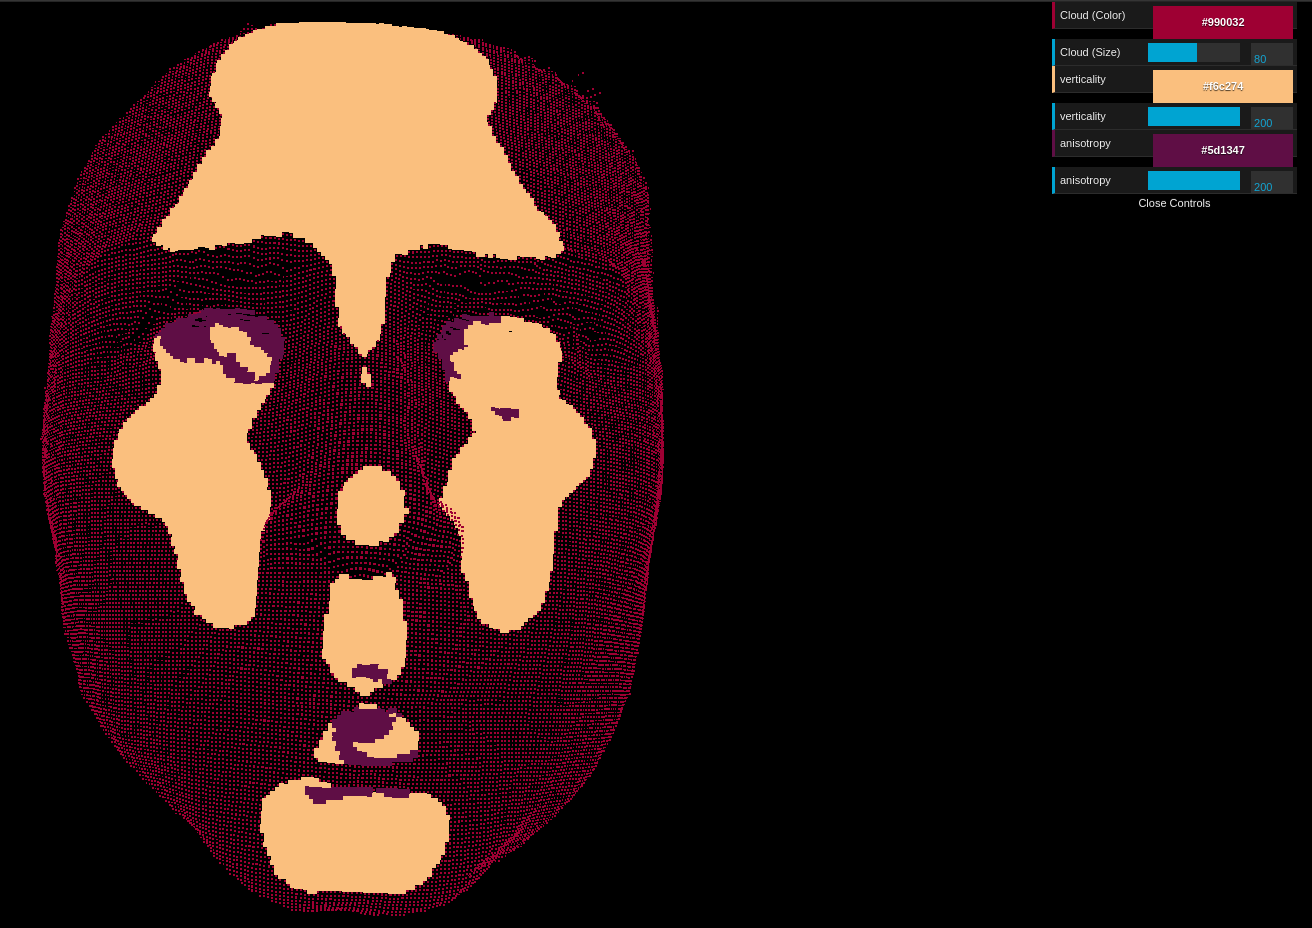

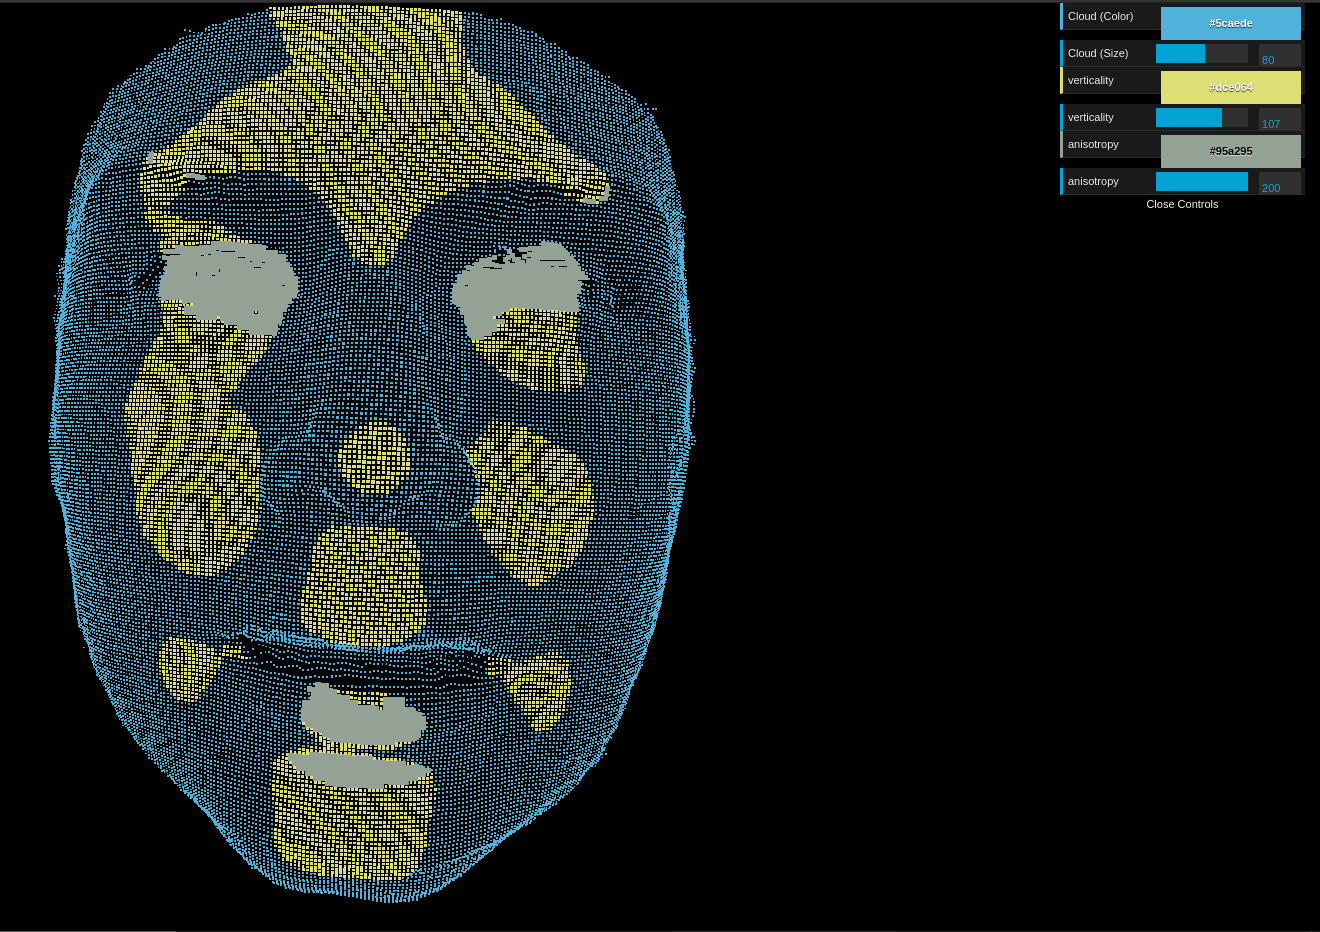

In [22]:
dfrev5 = load_dataset_and_create_diff_column('experiments_right_eye_v5.csv')
dfrev5['landmarks'] = df_tmp['points']
dfrev5

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,1008.0,1.0,2.801011,97.198989,-15.601 -2.163 12
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,1535.0,1.0,4.400803,95.599197,-19.342 -1.245 19.025
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,740.0,0.0,2.204152,97.795848,-12.587 1.645 9.665
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1606.0,1.0,4.580457,95.419543,-1.149 5.1 13.377
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,671.0,0.0,1.909016,98.090984,-0.17 1.363 15.56
...,...,...,...,...,...,...,...,...,...,...
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,2650.0,0.0,6.126459,93.873541,40.203 -2.225 -26.001
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,2651.0,0.0,5.902260,94.097740,22.343 -1.759 -12.04
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,2761.0,0.0,6.507342,93.492658,32.935 21.281 -9.514
4662,bs104_YR_R45_0.pcd,104,R45,YR,39012.0,1726.0,0.0,4.424280,95.575720,51.031 9.195 -35.288


## Dados

In [23]:
get_stats(dfrev5)

Porcentagem reduzida
  Média: 94.91922274408608
  Variância: 7.0186461679532846
Número de pontos que não possuem o ponto fiducial marcado: 306
Tamanho da nuvem filtrada
  Máximo: 12576.0
  Mínimo: 0.0
  Média: 1889.68623853211
  Variância: 1038187.7560849534


(94.91922274408608, 7.0186461679532846, 306, 12576.0, 0.0)

## Número de nuvens que possuem o ponto fiducial na região filtrada

In [24]:
dfrev5_true = dfrev5.loc[dfrev5['contains'] == 1]
dfrev5_true

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,1008.0,1.0,2.801011,97.198989,-15.601 -2.163 12
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,1535.0,1.0,4.400803,95.599197,-19.342 -1.245 19.025
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1606.0,1.0,4.580457,95.419543,-1.149 5.1 13.377
50,bs000_LFAU_12R_0.pcd,0,12R,LFAU,36271.0,2091.0,1.0,5.764936,94.235064,null
24,bs000_LFAU_14_0.pcd,0,14,LFAU,37201.0,1382.0,1.0,3.714954,96.285046,0.977 0.139 20.249
...,...,...,...,...,...,...,...,...,...,...
4642,bs104_O_MOUTH_0.pcd,104,MOUTH,O,44009.0,2661.0,1.0,6.046490,93.953510,24.317 -6.506 -18.079
4617,bs104_PR_SU_0.pcd,104,SU,PR,42302.0,2683.0,1.0,6.342490,93.657510,30.363 -7.389 -25.283
4664,bs104_PR_U_0.pcd,104,U,PR,43228.0,2902.0,1.0,6.713241,93.286759,38.722 10.915 -21.206
4628,bs104_UFAU_1_0.pcd,104,1,UFAU,43527.0,2163.0,1.0,4.969329,95.030671,21.948 -12.362 -10.254


## Número de nuvens que não possuem o ponto fiducial na região filtrada

In [25]:
dfrev5_false = dfrev5.loc[dfrev5['contains'] == 0]
dfrev5_false

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,740.0,0.0,2.204152,97.795848,-12.587 1.645 9.665
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,671.0,0.0,1.909016,98.090984,-0.17 1.363 15.56
11,bs000_E_DISGUST_0.pcd,0,DISGUST,E,36751.0,2105.0,0.0,5.727735,94.272265,-12.862 2.209 14.433
17,bs000_E_FEAR_0.pcd,0,FEAR,E,38166.0,1316.0,0.0,3.448095,96.551905,-13.876 4.505 17.328
19,bs000_E_HAPPY_0.pcd,0,HAPPY,E,37417.0,2537.0,0.0,6.780340,93.219660,-1.296 1.892 19.743
...,...,...,...,...,...,...,...,...,...,...
4621,bs104_UFAU_4_0.pcd,104,4,UFAU,40754.0,2045.0,0.0,5.017912,94.982088,45.771 14.345 -48.951
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,2650.0,0.0,6.126459,93.873541,40.203 -2.225 -26.001
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,2651.0,0.0,5.902260,94.097740,22.343 -1.759 -12.04
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,2761.0,0.0,6.507342,93.492658,32.935 21.281 -9.514


# Resultados v6 - Canto interno do olho direito

Filtros utilizados:
- Esfericidade [0.04, 0.1]
- Verticalidade [0, 0.1]

In [26]:
dfrev6 = load_dataset_and_create_diff_column('experiments_right_eye_v6.csv')
dfrev6['landmarks'] = df_tmp['points']
dfrev6

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,934.0,1.0,2.595382,97.404618,-15.601 -2.163 12
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,932.0,1.0,2.672018,97.327982,-19.342 -1.245 19.025
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,549.0,1.0,1.635243,98.364757,-12.587 1.645 9.665
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,557.0,0.0,1.588614,98.411386,-1.149 5.1 13.377
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,1115.0,1.0,3.172210,96.827790,-0.17 1.363 15.56
...,...,...,...,...,...,...,...,...,...,...
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,1293.0,0.0,2.989250,97.010750,40.203 -2.225 -26.001
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,1241.0,0.0,2.762997,97.237003,22.343 -1.759 -12.04
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,1309.0,0.0,3.085154,96.914846,32.935 21.281 -9.514
4662,bs104_YR_R45_0.pcd,104,R45,YR,39012.0,1253.0,0.0,3.211832,96.788168,51.031 9.195 -35.288


## Dados

In [27]:
get_stats(dfrev6)

Porcentagem reduzida
  Média: 96.69538428818099
  Variância: 3.082608386557778
Número de pontos que não possuem o ponto fiducial marcado: 306
Tamanho da nuvem filtrada
  Máximo: 7933.0
  Mínimo: 45.0
  Média: 1226.5465596330275
  Variância: 441284.56447542884


(96.69538428818099, 3.082608386557778, 306, 7933.0, 45.0)

## Número de nuvens que possuem o ponto fiducial na região filtrada

In [28]:
dfrev6_true = dfrev6.loc[dfrev6['contains'] == 1]
dfrev6_true

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,934.0,1.0,2.595382,97.404618,-15.601 -2.163 12
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,932.0,1.0,2.672018,97.327982,-19.342 -1.245 19.025
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,549.0,1.0,1.635243,98.364757,-12.587 1.645 9.665
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,1115.0,1.0,3.172210,96.827790,-0.17 1.363 15.56
11,bs000_E_DISGUST_0.pcd,0,DISGUST,E,36751.0,1528.0,1.0,4.157710,95.842290,-12.862 2.209 14.433
...,...,...,...,...,...,...,...,...,...,...
4575,bs103_O_HAIR_0.pcd,103,HAIR,O,36222.0,2370.0,1.0,6.542985,93.457015,null
4601,bs103_O_MOUTH_0.pcd,103,MOUTH,O,34813.0,1288.0,1.0,3.699767,96.300233,-4.7 67.635 23.252
4574,bs103_PR_U_0.pcd,103,U,PR,36826.0,1198.0,1.0,3.253136,96.746864,null
4636,bs104_E_HAPPY_0.pcd,104,HAPPY,E,41861.0,1995.0,1.0,4.765772,95.234228,21.606 -5.138 -11.884


## Número de nuvens que não possuem o ponto fiducial na região filtrada

In [29]:
dfrev6_false = dfrev6.loc[dfrev6['contains'] == 0]
dfrev6_false

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,557.0,0.0,1.588614,98.411386,-1.149 5.1 13.377
6,bs000_LFAU_27_0.pcd,0,27,LFAU,41865.0,940.0,0.0,2.245312,97.754688,-3.405 -0.157 23.356
29,bs000_PR_U_0.pcd,0,U,PR,33538.0,794.0,0.0,2.367464,97.632536,0.232 0.133 19.252
4,bs000_UFAU_44_0.pcd,0,44,UFAU,36742.0,287.0,0.0,0.781122,99.218878,-1.368 -12.608 28.601
15,bs000_YR_R45_0.pcd,0,R45,YR,33247.0,1095.0,0.0,3.293530,96.706470,-3.472 4.357 16.727
...,...,...,...,...,...,...,...,...,...,...
4621,bs104_UFAU_4_0.pcd,104,4,UFAU,40754.0,1004.0,0.0,2.463562,97.536438,45.771 14.345 -48.951
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,1293.0,0.0,2.989250,97.010750,40.203 -2.225 -26.001
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,1241.0,0.0,2.762997,97.237003,22.343 -1.759 -12.04
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,1309.0,0.0,3.085154,96.914846,32.935 21.281 -9.514


In [30]:
lle_cloud, lle_point = [], []
with open('landmarks_left_eye.txt', 'r') as f:
    for line in f.readlines():
        spl = line.split(':')
        cloud = spl[0]
        point = spl[1].strip()
        lle_cloud.append(cloud)
        lle_point.append(point)
df_tmp1 = pd.DataFrame({'cloud': lle_cloud, 'points': lle_point})
df_tmp1.sort_values(by='cloud', inplace=True)

# Resultados v1 - Canto interno do olho esquerdo

Filtros utilizados:
- Verticalidade: [0, 0.1]
- Anisotropia: [0.8, 0.96]

In [31]:
dflev1 = load_dataset_and_create_diff_column('experiments_left_eye_v1.csv')
dflev1['landmarks'] = df_tmp1['points']
dflev1

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,1008.0,1.0,2.801011,97.198989,-45.211 -2.223 8.725
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,1535.0,1.0,4.400803,95.599197,-52.569 -2.973 14.003
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,740.0,0.0,2.204152,97.795848,-44.355 1.583 9.476
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1606.0,0.0,4.580457,95.419543,-33.363 4.992 15.894
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,671.0,1.0,1.909016,98.090984,-32.331 -1.737 18.226
...,...,...,...,...,...,...,...,...,...,...
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,2650.0,0.0,6.126459,93.873541,11.932 -1.294 -7.649
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,2651.0,0.0,5.902260,94.097740,-7.903 -2.076 -11.428
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,2761.0,0.0,6.507342,93.492658,2.835 19.513 -8.743
4662,bs104_YR_R45_0.pcd,104,R45,YR,NaN,NaN,NaN,NaN,NaN,22.186 8.399 -45.775


## Número de nuvens que possuem o ponto fiducial na região filtrada

In [32]:
dflev1_true = dflev1.loc[dflev1['contains'] == 1]
dflev1_true

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,1008.0,1.0,2.801011,97.198989,-45.211 -2.223 8.725
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,1535.0,1.0,4.400803,95.599197,-52.569 -2.973 14.003
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,671.0,1.0,1.909016,98.090984,-32.331 -1.737 18.226
17,bs000_E_FEAR_0.pcd,0,FEAR,E,38166.0,1316.0,1.0,3.448095,96.551905,-45.5 2.857 14.453
19,bs000_E_HAPPY_0.pcd,0,HAPPY,E,37417.0,2537.0,1.0,6.780340,93.219660,-31.077 -0.471 18.459
...,...,...,...,...,...,...,...,...,...,...
4652,bs104_LFAU_25_0.pcd,104,25,LFAU,43079.0,1720.0,1.0,3.992665,96.007335,7.822 -16.271 -13.488
4627,bs104_LFAU_27_0.pcd,104,27,LFAU,45565.0,1983.0,1.0,4.352025,95.647975,4.164 13.601 -10.119
4622,bs104_LFAU_9_0.pcd,104,9,LFAU,41927.0,2894.0,1.0,6.902473,93.097527,-6.567 -1.334 -13.962
4624,bs104_N_N_0.pcd,104,N,N,48361.0,2621.0,1.0,5.419656,94.580344,-9.139 -4.237 -7.595


## Número de nuvens que não possuem o ponto fiducial na região filtrada

In [33]:
dflev1_false = dflev1.loc[dflev1['contains'] == 0]
dflev1_false

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,740.0,0.0,2.204152,97.795848,-44.355 1.583 9.476
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1606.0,0.0,4.580457,95.419543,-33.363 4.992 15.894
11,bs000_E_DISGUST_0.pcd,0,DISGUST,E,36751.0,2105.0,0.0,5.727735,94.272265,-44.594 2.09 9.621
24,bs000_LFAU_14_0.pcd,0,14,LFAU,37201.0,1382.0,0.0,3.714954,96.285046,-28.82 0.07 19.649
30,bs000_LFAU_23_0.pcd,0,23,LFAU,37677.0,1546.0,0.0,4.103299,95.896701,-33.334 -0.231 19.24
...,...,...,...,...,...,...,...,...,...,...
4621,bs104_UFAU_4_0.pcd,104,4,UFAU,40754.0,2045.0,0.0,5.017912,94.982088,14.762 13.503 -47.43
4620,bs104_YR_L45_0.pcd,104,L45,YR,42179.0,2433.0,0.0,5.768273,94.231727,8.088 9.374 -5.433
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,2650.0,0.0,6.126459,93.873541,11.932 -1.294 -7.649
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,2651.0,0.0,5.902260,94.097740,-7.903 -2.076 -11.428


# Resultados v2 - Canto interno do olho esquerdo

Filtros utilizados:
- Curvatura Gaussiana: [0.002, 0.008]

In [34]:
dflev2 = load_dataset_and_create_diff_column('experiments_left_eye_v2.csv')
dflev2['landmarks'] = df_tmp1['points']
dflev2

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,2221.0,1.0,6.171673,93.828327,-45.211 -2.223 8.725
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,2316.0,1.0,6.639908,93.360092,-52.569 -2.973 14.003
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,1669.0,0.0,4.971257,95.028743,-44.355 1.583 9.476
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1957.0,0.0,5.581541,94.418459,-33.363 4.992 15.894
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,1609.0,1.0,4.577655,95.422345,-32.331 -1.737 18.226
...,...,...,...,...,...,...,...,...,...,...
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,1774.0,0.0,4.101260,95.898740,11.932 -1.294 -7.649
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,1836.0,0.0,4.087721,95.912279,-7.903 -2.076 -11.428
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,1749.0,0.0,4.122181,95.877819,2.835 19.513 -8.743
4662,bs104_YR_R45_0.pcd,104,R45,YR,NaN,NaN,NaN,NaN,NaN,22.186 8.399 -45.775


## Número de nuvens que possuem o ponto fiducial na região filtrada

In [35]:
dflev2_true = dflev2.loc[dflev2['contains'] == 1]
dflev2_true

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,2221.0,1.0,6.171673,93.828327,-45.211 -2.223 8.725
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,2316.0,1.0,6.639908,93.360092,-52.569 -2.973 14.003
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,1609.0,1.0,4.577655,95.422345,-32.331 -1.737 18.226
11,bs000_E_DISGUST_0.pcd,0,DISGUST,E,36751.0,2035.0,1.0,5.537264,94.462736,-44.594 2.09 9.621
17,bs000_E_FEAR_0.pcd,0,FEAR,E,38166.0,2403.0,1.0,6.296180,93.703820,-45.5 2.857 14.453
...,...,...,...,...,...,...,...,...,...,...
4617,bs104_PR_SU_0.pcd,104,SU,PR,42302.0,1289.0,1.0,3.047137,96.952863,-0.003 -8.345 -23.667
4639,bs104_UFAU_43_0.pcd,104,43,UFAU,42669.0,1852.0,1.0,4.340388,95.659612,3.312 9.889 -3.13
4616,bs104_UFAU_44_0.pcd,104,44,UFAU,42959.0,1866.0,1.0,4.343677,95.656323,-7.882 -15.183 -2.508
4621,bs104_UFAU_4_0.pcd,104,4,UFAU,40754.0,1561.0,1.0,3.830299,96.169701,14.762 13.503 -47.43


## Número de nuvens que não possuem o ponto fiducial na região filtrada

In [36]:
dflev2_false = dflev2.loc[dflev2['contains'] == 0]
dflev2_false

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,1669.0,0.0,4.971257,95.028743,-44.355 1.583 9.476
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1957.0,0.0,5.581541,94.418459,-33.363 4.992 15.894
12,bs000_LFAU_9_0.pcd,0,9,LFAU,36786.0,1601.0,0.0,4.352199,95.647801,-33.359 4.999 16.406
21,bs000_YR_R20_0.pcd,0,R20,YR,38712.0,1820.0,0.0,4.701385,95.298615,-33.368 1.698 15.485
54,bs001_CR_RD_0.pcd,1,RD,CR,29317.0,1111.0,0.0,3.789610,96.210390,-58.515 36.879 -16.513
...,...,...,...,...,...,...,...,...,...,...
4628,bs104_UFAU_1_0.pcd,104,1,UFAU,43527.0,1606.0,0.0,3.689664,96.310336,-8.161 -13.142 -11.112
4644,bs104_UFAU_2_0.pcd,104,2,UFAU,42207.0,1680.0,0.0,3.980382,96.019618,19.136 -6.246 -19.526
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,1774.0,0.0,4.101260,95.898740,11.932 -1.294 -7.649
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,1836.0,0.0,4.087721,95.912279,-7.903 -2.076 -11.428


# Resultados v3 - Canto interno do olho esquerdo

Filtros utilizados:
- Esfericidade [0.04, 0.1]
- Verticalidade [0, 0.1]

In [37]:
dflev3 = load_dataset_and_create_diff_column('experiments_left_eye_v3.csv')
dflev3['landmarks'] = df_tmp1['points']
dflev3

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,934.0,1.0,2.595382,97.404618,-45.211 -2.223 8.725
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,932.0,1.0,2.672018,97.327982,-52.569 -2.973 14.003
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,549.0,0.0,1.635243,98.364757,-44.355 1.583 9.476
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,557.0,0.0,1.588614,98.411386,-33.363 4.992 15.894
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,1115.0,1.0,3.172210,96.827790,-32.331 -1.737 18.226
...,...,...,...,...,...,...,...,...,...,...
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,1293.0,0.0,2.989250,97.010750,11.932 -1.294 -7.649
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,1241.0,0.0,2.762997,97.237003,-7.903 -2.076 -11.428
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,1309.0,0.0,3.085154,96.914846,2.835 19.513 -8.743
4662,bs104_YR_R45_0.pcd,104,R45,YR,NaN,NaN,NaN,NaN,NaN,22.186 8.399 -45.775


## Número de nuvens que possuem o ponto fiducial na região filtrada

In [38]:
dflev3_true = dflev3.loc[dflev3['contains'] == 1]
dflev3_true

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,934.0,1.0,2.595382,97.404618,-45.211 -2.223 8.725
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,932.0,1.0,2.672018,97.327982,-52.569 -2.973 14.003
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,1115.0,1.0,3.172210,96.827790,-32.331 -1.737 18.226
11,bs000_E_DISGUST_0.pcd,0,DISGUST,E,36751.0,1528.0,1.0,4.157710,95.842290,-44.594 2.09 9.621
19,bs000_E_HAPPY_0.pcd,0,HAPPY,E,37417.0,1346.0,1.0,3.597295,96.402705,-31.077 -0.471 18.459
...,...,...,...,...,...,...,...,...,...,...
4525,bs102_UFAU_43_0.pcd,102,43,UFAU,33375.0,1088.0,1.0,3.259925,96.740075,-31.385 27.458 66.735
4533,bs102_UFAU_44_0.pcd,102,44,UFAU,31782.0,785.0,1.0,2.469952,97.530048,-9.675 -15.03 -24.876
4602,bs103_LFAU_12_0.pcd,103,12,LFAU,34029.0,1241.0,1.0,3.646889,96.353111,-37.656 76.187 -6.112
4636,bs104_E_HAPPY_0.pcd,104,HAPPY,E,41861.0,1995.0,1.0,4.765772,95.234228,-9.4 -6.144 -14.211


## Número de nuvens que não possuem o ponto fiducial na região filtrada

In [39]:
dflev3_false = dflev3.loc[dflev3['contains'] == 0]
dflev3_false

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,549.0,0.0,1.635243,98.364757,-44.355 1.583 9.476
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,557.0,0.0,1.588614,98.411386,-33.363 4.992 15.894
17,bs000_E_FEAR_0.pcd,0,FEAR,E,38166.0,1294.0,0.0,3.390452,96.609548,-45.5 2.857 14.453
36,bs000_E_SADNESS_0.pcd,0,SADNESS,E,36566.0,1166.0,0.0,3.188755,96.811245,-42.559 -14.461 27.336
48,bs000_E_SURPRISE_0.pcd,0,SURPRISE,E,39163.0,408.0,0.0,1.041800,98.958200,null
...,...,...,...,...,...,...,...,...,...,...
4621,bs104_UFAU_4_0.pcd,104,4,UFAU,40754.0,1004.0,0.0,2.463562,97.536438,14.762 13.503 -47.43
4620,bs104_YR_L45_0.pcd,104,L45,YR,42179.0,1194.0,0.0,2.830793,97.169207,8.088 9.374 -5.433
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,1293.0,0.0,2.989250,97.010750,11.932 -1.294 -7.649
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,1241.0,0.0,2.762997,97.237003,-7.903 -2.076 -11.428


In [40]:
lnt_cloud, lnt_point = [], []
with open('landmarks_nose_tip.txt', 'r') as f:
    for line in f.readlines():
        spl = line.split(':')
        cloud = spl[0]
        point = spl[1].strip()
        lnt_cloud.append(cloud)
        lnt_point.append(point)
df_tmp2 = pd.DataFrame({'cloud': lnt_cloud, 'points': lnt_point})
df_tmp2.sort_values(by='cloud', inplace=True)

# Resultados v1 - Ponta do nariz

Filtros utilizados:
- Curvatura Gaussiana: [0.005, 0.02]

In [41]:
dfntv1 = load_dataset_and_create_diff_column('experiments_nose_tip_v1.csv')
dfntv1['landmarks'] = df_tmp2['points']
dfntv1

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,907.0,1.0,2.520355,97.479645,-27.566 -29.196 46.918
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,942.0,1.0,2.700688,97.299312,-33.344 -30.511 53.434
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,557.0,1.0,1.659071,98.340929,-25.335 -23.994 48.096
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,988.0,1.0,2.817865,97.182135,-16.887 -22.153 53.426
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,981.0,1.0,2.790976,97.209024,-15.038 -31.677 56.04
...,...,...,...,...,...,...,...,...,...,...
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,943.0,1.0,2.180095,97.819905,23.453 -32.475 10.529
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,938.0,1.0,2.088389,97.911611,7.727 -33.323 23.275
4640,bs104_YR_R30_0.pcd,104,R30,YR,42429.0,878.0,1.0,2.069339,97.930661,18.166 -8.349 28.211
4662,bs104_YR_R45_0.pcd,104,R45,YR,39012.0,548.0,0.0,1.404696,98.595304,21.861 -19.955 -5.469


In [42]:
get_stats(dfntv1)

Porcentagem reduzida
  Média: 97.55694698718187
  Variância: 0.7925572269600241
Número de pontos que não possuem o ponto fiducial marcado: 4
Tamanho da nuvem filtrada
  Máximo: 6759.0
  Mínimo: 0.0
  Média: 903.9101244101244
  Variância: 119802.83272733915


(97.55694698718187, 0.7925572269600241, 4, 6759.0, 0.0)

In [43]:
dfntv1_true = dfntv1.loc[dfntv1['contains'] == 1]
dfntv1_true

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
16,bs000_CAU_A22A25_0.pcd,0,A22A25,CAU,35987.0,907.0,1.0,2.520355,97.479645,-27.566 -29.196 46.918
35,bs000_CAU_A26A12lw_0.pcd,0,A26A12lw,CAU,34880.0,942.0,1.0,2.700688,97.299312,-33.344 -30.511 53.434
0,bs000_CR_RD_0.pcd,0,RD,CR,33573.0,557.0,1.0,1.659071,98.340929,-25.335 -23.994 48.096
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,988.0,1.0,2.817865,97.182135,-16.887 -22.153 53.426
40,bs000_E_ANGER_0.pcd,0,ANGER,E,35149.0,981.0,1.0,2.790976,97.209024,-15.038 -31.677 56.04
...,...,...,...,...,...,...,...,...,...,...
4621,bs104_UFAU_4_0.pcd,104,4,UFAU,40754.0,920.0,1.0,2.257447,97.742553,28.67 -13.496 -13.578
4620,bs104_YR_L45_0.pcd,104,L45,YR,42179.0,395.0,1.0,0.936485,99.063515,22.532 -22.045 30.562
4647,bs104_YR_R10_0.pcd,104,R10,YR,43255.0,943.0,1.0,2.180095,97.819905,23.453 -32.475 10.529
4626,bs104_YR_R20_0.pcd,104,R20,YR,44915.0,938.0,1.0,2.088389,97.911611,7.727 -33.323 23.275


In [44]:
dfntv1_false = dfntv1.loc[dfntv1['contains'] == 0]
dfntv1_false

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida,landmarks
5,bs000_YR_L45_0.pcd,0,L45,YR,35303.0,679.0,0.0,1.923349,98.076651,-15.64 -44.209 50.155
9,bs000_YR_L90_0.pcd,0,L90,YR,23032.0,407.0,0.0,1.767107,98.232893,-6.435 -29.079 59.908
15,bs000_YR_R45_0.pcd,0,R45,YR,33247.0,507.0,0.0,1.524950,98.475050,-15.389 -24.363 53.969
33,bs000_YR_R90_0.pcd,0,R90,YR,26546.0,265.0,0.0,0.998267,99.001733,-36.335 -30.07 52.706
88,bs001_YR_L45_0.pcd,1,L45,YR,29969.0,651.0,0.0,2.172245,97.827755,2.635 28.026 -9.895
...,...,...,...,...,...,...,...,...,...,...
4562,bs103_YR_L90_0.pcd,103,L90,YR,23906.0,11.0,0.0,0.046014,99.953986,-18.766 -18.438 80.502
4595,bs103_YR_R90_0.pcd,103,R90,YR,22300.0,200.0,0.0,0.896861,99.103139,-4.284 14.535 77.795
4619,bs104_YR_L90_0.pcd,104,L90,YR,26780.0,103.0,0.0,0.384615,99.615385,10.225 -32.891 1.511
4662,bs104_YR_R45_0.pcd,104,R45,YR,39012.0,548.0,0.0,1.404696,98.595304,21.861 -19.955 -5.469


In [45]:
dfntv1_false['expression'].value_counts()

R90         104
L90         103
L45          75
R45          49
RD           35
RU           17
R30          17
D            16
N            12
DISGUST      11
U            11
SD           11
MOUTH        11
43           11
28           10
R10          10
R20          10
34           10
2             9
SADNESS       9
27            8
SU            8
24            7
4             7
HAPPY         7
10            6
44            6
FEAR          6
ANGER         6
SURPRISE      6
HAIR          5
1             5
22            5
9             5
15            5
12L           5
GLASSES       5
23            5
14            5
EYE           5
A22A25        4
25            4
12            4
18            3
20            3
16            3
12R           3
26            3
17            1
A26A12lw      1
INV           1
Name: expression, dtype: int64

In [46]:
dfntv1_false['type'].value_counts()

YR      368
LFAU     95
CR       52
PR       46
E        45
UFAU     38
O        26
N        12
CAU       5
IGN       1
Name: type, dtype: int64

In [47]:
dfntv1_true['expression'].value_counts()

N           287
12          103
EYE         100
HAPPY        99
GLASSES      99
4            98
27           97
SU           97
2            96
28           95
34           95
R20          95
R10          95
9            94
SD           94
43           94
MOUTH        94
U            94
A22A25       93
RU           89
R30          88
D            88
17           70
26           69
RD           68
14           68
18           68
16           67
23           67
25           66
12R          66
44           65
SURPRISE     65
22           65
10           65
ANGER        65
FEAR         64
24           63
12LW         62
12L          62
20           62
HAIR         62
A26A12lw     62
DISGUST      58
SADNESS      57
R45          55
15           50
1            41
L45          29
INV          17
A12A15        9
L90           2
R90           1
Name: expression, dtype: int64